Found 2732 images belonging to 10 classes.
Found 1629 images belonging to 10 classes.
Epoch 1/30
86/86 [==============================] - 84s 687ms/step - loss: 0.4235 - accuracy: 0.7185 - val_loss: 9.8383 - val_accuracy: 0.2676
Epoch 2/30
86/86 [==============================] - 56s 649ms/step - loss: 0.2211 - accuracy: 0.8712 - val_loss: 10.2212 - val_accuracy: 0.2333
Epoch 3/30
86/86 [==============================] - 55s 636ms/step - loss: 0.1292 - accuracy: 0.9228 - val_loss: 5.4069 - val_accuracy: 0.2805
Epoch 4/30
86/86 [==============================] - 62s 718ms/step - loss: 0.1080 - accuracy: 0.9283 - val_loss: 5.4571 - val_accuracy: 0.3567
Epoch 5/30
86/86 [==============================] - 55s 636ms/step - loss: 0.0943 - accuracy: 0.9473 - val_loss: 4.7321 - val_accuracy: 0.2947
Epoch 6/30
86/86 [==============================] - 55s 635ms/step - loss: 0.1114 - accuracy: 0.9367 - val_loss: 6.8482 - val_accuracy: 0.3425
Epoch 7/30
86/86 [==============================] - 62s

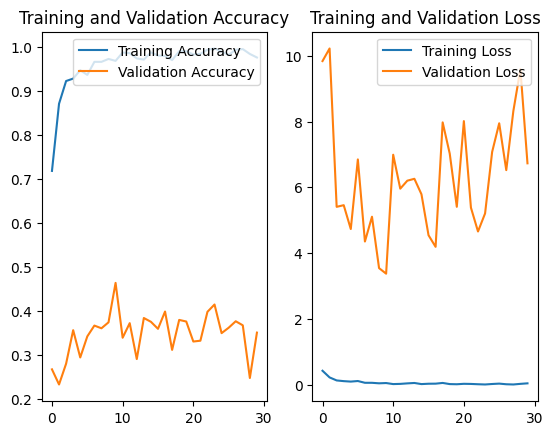

51/51 [==============================] - 15s 282ms/step - loss: 6.7299 - accuracy: 0.3511
Found 1629 files belonging to 10 classes.


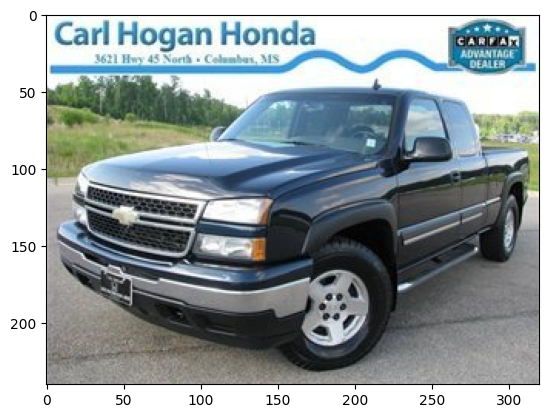

1/1 [==============================] - 2s 2s/step
Prediction: Cab with a 23.14 percent confidence.


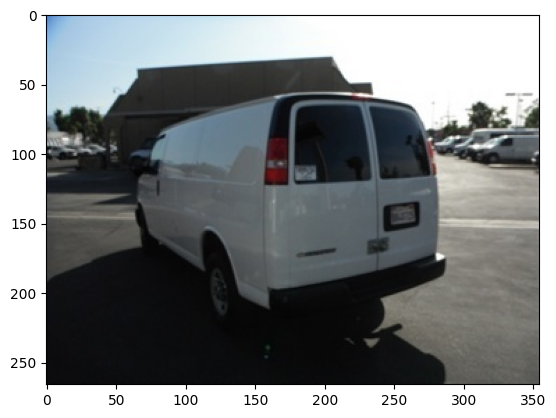

1/1 [==============================] - 0s 24ms/step
Prediction: SUV with a 16.84 percent confidence.


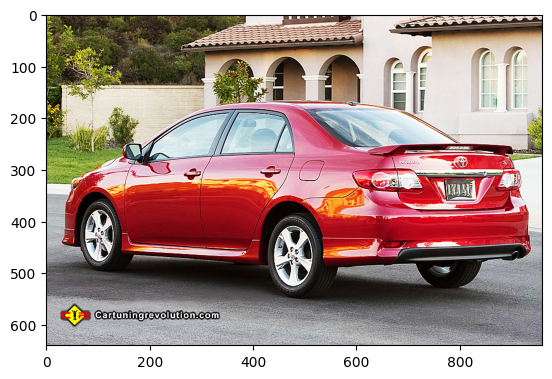

1/1 [==============================] - 0s 34ms/step
Prediction: Sedan with a 21.52 percent confidence.


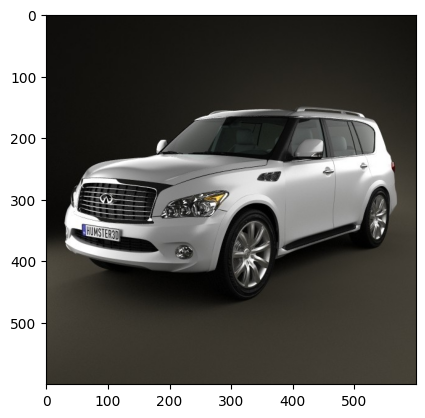

1/1 [==============================] - 0s 25ms/step
Prediction: Cab with a 16.63 percent confidence.


In [ ]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
import pandas as pd
import PIL
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
from sklearn.utils.class_weight import compute_sample_weight

train_folder = '/content/drive/MyDrive/stanford_cars_type/train'
test_folder = '/content/drive/MyDrive/stanford_cars_type/test'
csv_path = '/content/drive/MyDrive/stanford_cars_type.csv'

df = pd.read_csv(csv_path)

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_folder,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_folder,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)
class_labels = train_generator.class_indices
class_weights = compute_sample_weight(class_weight="balanced", y=train_generator.classes)
class_weights_dict = dict(zip(class_labels.values(), class_weights))

base_model = Xception(weights='imagenet', include_top=False)
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_generator, epochs=30, validation_data=test_generator, class_weight=class_weights_dict)

model.save('/content/drive/MyDrive/stanford_cars_type/xception_brand_model30bal')

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(history.epoch))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='upper right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

plt.savefig('/content/drive/MyDrive/stanford_cars_type/training_accuracy_loss_xception30bal.png')

model.evaluate(test_generator)

model = load_model('/content/drive/MyDrive/stanford_cars_type/xception_brand_model30bal')

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/stanford_cars_type/test',
    seed=42,
    image_size=(224,224),
    batch_size=32,
)

class_names = test_ds.class_names

car_path = [
    "/content/drive/MyDrive/stanford_cars_type/Cab/01029_Chevrolet Silverado 1500 Classic Extended Cab 2007.jpg",
    "/content/drive/MyDrive/stanford_cars_type/Van/01544_Chevrolet Express Van 2007.jpg",
    "/content/drive/MyDrive/stanford_cars_type/Sedan/00203_Toyota Corolla Sedan 2012.jpg",
    "/content/drive/MyDrive/stanford_cars_type/SUV/00291_Infiniti QX56 SUV 2011.jpg"
]

for car in car_path:
    image = load_img(car, target_size=(224, 224))
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    image = tf.keras.applications.xception.preprocess_input(image)

    temp = plt.imread(car)
    plt.imshow(temp)
    plt.show()

    predictions = model.predict(image)
    score = tf.nn.softmax(predictions[0])

    print(
        "Prediction: {} with a {:.2f} percent confidence."
        .format(class_names[np.argmax(score)], 100 * np.max(score))
    )


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
